In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [3]:
# Get an average player in the top NPLayers * 13 player slots
# stats = pd.read_csv('./yahoo.csv')
# stats['name'] = stats['FirstName'] + ' ' + stats['LastName']
# stats=stats.set_index('name')
# stats=stats.drop(['FirstName', 'LastName', 'PercentDrafted'], axis=1)

stats = pd.read_csv('./hashtag_stats.csv', header=None)
# stats['name'] = stats['FirstName'] + ' ' + stats['LastName']
cols =['PLAYER', 'POS', 'GP', 'MPG', 'FGM', 'FG', 'FTM', 'FT', '3PM', 'PTS', 'TREB', 'AST', 'STL', 'BLK', 'TO', 'TOTAL']
stats.columns=cols
stats=stats.set_index('PLAYER')
stats['FG_perc'] = stats.apply(lambda x: x['FG'].split('(')[0], axis=1).astype(float)
stats['FT_perc'] = stats.apply(lambda x: x['FT'].split('(')[0], axis=1).astype(float)
stats = stats.drop(['FG', 'FT'], axis=1)
stats['old_rank'] = stats['TOTAL'].rank(ascending=False)

In [4]:
stats2 = pd.read_csv('./hashtag_zs.csv', index_col=0)
stats2=stats2.set_index('PLAYER')
stats2['FG_perc'] = stats2.apply(lambda x: x['FG%'].split('(')[0], axis=1).astype(float)
stats2['FT_perc'] = stats2.apply(lambda x: x['FT%'].split('(')[0], axis=1).astype(float)
stats2 = stats2.drop(['FG%', 'FT%'], axis=1)
stats2['old_rank'] = stats2['TOTAL'].rank(ascending=False)

In [5]:
stats2

,ADP,POS,TEAM,GP,MPG,3PM,PTS,TREB,AST,STL,BLK,TO,TOTAL,TO.1,TOTAL.1,FG_perc,FT_perc,old_rank
PLAYER,,,,,,,,,,,,,,,,,,
Nikola Jokic,1.3,C,DEN,74,33.5,1.2,26.3,13.8,8.4,1.4,0.9,3.9,15.81,3.9,20.30,0.577,0.831,1.0
Kevin Durant,4.9,"SF,PF",BRO,68,35.7,2.1,29.2,7.2,6.3,0.9,0.9,3.4,12.89,3.2,20.02,0.517,0.907,2.0
Joel Embiid,3.4,"PF,C",PHI,68,33.8,1.3,30.4,11.9,4.0,1.1,1.5,3.2,12.42,3.4,18.63,0.495,0.821,3.0
James Harden,8.2,"PG,SG",PHI,70,36.4,2.3,22.1,7.5,10.2,1.3,0.6,4.4,10.75,3.4,16.97,0.446,0.868,4.0
Giannis Antetokounmpo,3.3,"PF,C",MIL,68,32.8,1.1,30.3,11.8,5.9,1.1,1.4,3.4,9.90,4.4,15.13,0.551,0.728,5.0
LeBron James,16.1,"SF,PF",LAL,68,33.4,2.7,27.6,7.5,6.1,1.2,1.0,3.2,9.63,4.6,13.74,0.523,0.750,6.0
Stephen Curry,6.2,PG,GSW,64,34.4,4.6,25.1,5.3,6.4,1.2,0.4,3.3,9.58,3.2,13.62,0.441,0.914,7.0
Karl-Anthony Towns,9.4,"PF,C",MIN,70,33.5,2.2,23.4,8.7,3.7,1.0,1.0,3.2,8.70,3.9,13.40,0.514,0.833,8.0
Kyrie Irving,16.9,"PG,SG",BRO,59,36.4,3.1,26.6,4.0,5.2,1.2,0.6,2.5,8.58,3.3,12.73,0.470,0.912,9.0


In [6]:
stats['FTA']=stats['FTM']/stats['FT_perc']
stats['FGA']=stats['FGM']/stats['FG_perc']

In [7]:
stats = stats.iloc[:13*14]
stats=stats.rename({'TREB':'REB', 'STL':'ST', '3PM':'3PTM'}, axis=1)

In [8]:
# avgs = stats.iloc[:, 3:].div(stats.iloc[:, 1], axis=0).drop(['FG_perc', 'FT_perc', 'PTS'], axis=1)
avgs = stats.iloc[:, 3:].drop(['FG_perc', 'FT_perc', 'PTS', 'TOTAL', 'old_rank'], axis=1)

In [9]:
rp = avgs.mean()

In [10]:
rp_med = np.median(avgs, axis=0)

In [11]:
rp

FGM      5.992308
FTM      2.686813
3PTM     1.621429
REB      5.784615
AST      3.463187
ST       0.951099
BLK      0.652198
TO       1.936264
FTA      3.402661
FGA     12.593796
dtype: float64

In [12]:
nPlayers = 12
nGames = 3.14
rest_of_team = rp*nPlayers

In [13]:
replacement_team = (rest_of_team + rp)*nGames

In [14]:
replacement_team

FGM     244.606000
FTM     109.675714
3PTM     66.186714
REB     236.128000
AST     141.367286
ST       38.823857
BLK      26.622714
TO       79.038286
FTA     138.896608
FGA     514.078742
dtype: float64

In [15]:
weekly = avgs*nGames

In [16]:
team_weekly = weekly + rest_of_team*nGames
rest_of_team

FGM      71.907692
FTM      32.241758
3PTM     19.457143
REB      69.415385
AST      41.558242
ST       11.413187
BLK       7.826374
TO       23.235165
FTA      40.831928
FGA     151.125549
dtype: float64

In [17]:
avgt = avgs.loc[['LeBron James', 'Fred VanVleet', 'Shai Gilgeous-Alexander', 'Kristaps Porzingis', 'Khris Middleton'
         , 'Terry Rozier', 'Julius Randle', 'Klay Thompson', 'Saddiq Bey', 'PJ Washington', 'Gordon Hayward'
         , 'Kyle Lowry', 'Kyle Kuzma']]

In [18]:
# team_weekly
# #rest_of_team
# np.sqrt(73+58)
# for ease, rename team_weekly to_matchup
matchup = team_weekly.copy()

In [19]:
avgt = avgt.sum()*3.14
#matchup

In [20]:
matchup=pd.DataFrame()
matchup['t1']=avgt
matchup['t2']=avgt
matchup = matchup.T

In [21]:
matchup['2PM'] = matchup['FGM'] - matchup['3PTM']
matchup['FTO'] = matchup['FTA'] - matchup['FTM']
matchup['FGO'] = matchup['FGA'] - matchup['FGM']
matchup = matchup.drop(['FGM', 'FGA', 'FTA'], axis=1)
#matchup = matchup.drop(['FGM', 'FGA', 'FTA'])

replacement_team['2PM'] = replacement_team['FGM'] - replacement_team['3PTM']
replacement_team['FTO'] = replacement_team['FTA'] - replacement_team['FTM']
replacement_team['FGO'] = replacement_team['FGA'] - replacement_team['FGM']
replacement_team = replacement_team.drop(['FGM', 'FGA', 'FTA'])
#t1 = matchup.loc[team1, :].astype(float)

In [22]:
n=10000
t2 = replacement_team.copy()
d2 = np.random.poisson(t2.values, size=(n, t2.shape[0]))
df2 = pd.DataFrame(d2, columns=t2.index)
df2['FGM'] = df2['2PM'] + df2['3PTM']
df2['FGA'] = df2['FGO'] + df2['FGM']
df2['FTA'] = df2['FTO'] + df2['FTM']
df2['PTS'] = 3*df2['3PTM'] + 2*df2['2PM'] + df2['FTM']
df2 = df2.drop(axis=1, labels=['2PM', 'FTO','FGO'])
df2['FG_perc'] = df2['FGM'] / df2['FGA']
df2['FT_perc'] = df2['FTM'] / df2['FTA']
df2 = df2.drop(['FGM','FTM','FGA', 'FTA'], axis=1)

In [23]:
df2.head()
matchup

,FTM,3PTM,REB,AST,ST,BLK,TO,2PM,FTO,FGO
t1,131.566,98.596,243.664,179.922,40.82,26.062,92.002,186.516,28.882238,343.847781
t2,131.566,98.596,243.664,179.922,40.82,26.062,92.002,186.516,28.882238,343.847781


t1
t2


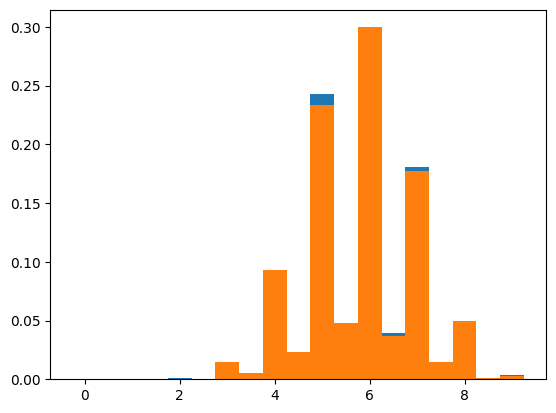

In [24]:
names = []
win_percs = []
evs = []
for index, t1 in matchup.iterrows():
    print(index)
    d1 = np.random.poisson(t1.values, size=(n, t1.shape[0]))
    df1 = pd.DataFrame(d1, columns=t1.index)
    df1['FGM'] = df1['2PM'] + df1['3PTM']
    df1['FGA'] = df1['FGO'] + df1['FGM']
    df1['FTA'] = df1['FTO'] + df1['FTM']
    df1['PTS'] = 3*df1['3PTM'] + 2*df1['2PM'] + df1['FTM']
    df1 = df1.drop(axis=1, labels=['2PM', 'FTO','FGO'])
    df1['FG_perc'] = df1['FGM'] / df1['FGA']
    df1['FT_perc'] = df1['FTM'] / df1['FTA']
    df1 = df1.drop(['FGM','FTM','FGA', 'FTA'], axis=1)
    
    # Get performance
    win = (df1>df2).astype(int)
    win['TO'] = (df1['TO']<df2['TO']).astype(int)
    tie = (df1==df2).astype(int)
    result = win + 0.5*tie
    wins = result.sum(axis=1)
    weights = np.ones_like(wins) / float(len(wins))
    hold = plt.hist(wins, bins=np.arange(0,20)/2.-.25, weights=weights)
    freq = hold[0] * 100
    num = hold[1][:-1] + 0.25
    outcome = pd.Series(freq, index=num).round(2)
    perc_win = (win.sum(axis=0)/n*100.).round(2)
    perc_win.name = 'Win'
    perc_tie = (tie.sum(axis=0)/n*100.).round(2)
    perc_tie.name = 'Tie'
    perc = pd.concat([perc_win, perc_tie], axis=1)
    ev = np.round(np.sum(outcome/100.*np.arange(19)/2.), 3)
    win_match = outcome[outcome.index>=5].sum()
    
    names.append(t1.name)
    evs.append(ev)
    win_percs.append(win_match)


In [25]:
results = pd.DataFrame()
results['player'] = names
results['ev'] = evs
results['win_perc'] = win_percs
results=results.set_index('player')
results.sort_values('ev', ascending=False)

,ev,win_perc
player,,
t2,5.790,86.27
t1,5.789,86.77


In [26]:
perc_win

3PTM       99.39
REB        63.02
AST        98.27
ST         56.58
BLK        44.15
TO         14.71
PTS        99.10
FG_perc    22.65
FT_perc    74.03
Name: Win, dtype: float64

In [27]:
combined = results.join(stats2, how='inner')

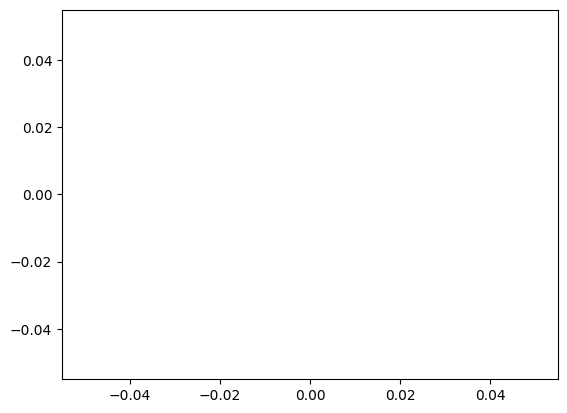

In [28]:
plt.scatter(combined['ev'], combined['old_rank'])
plt.show()

In [29]:
combined.sort_values('ev', ascending=False)

,ev,win_perc,ADP,POS,TEAM,GP,MPG,3PM,PTS,TREB,AST,STL,BLK,TO,TOTAL,TO.1,TOTAL.1,FG_perc,FT_perc,old_rank


In [30]:
combined['new_rank'] = combined['ev'].rank(ascending=False)

In [31]:
combined['diff']=(combined['old_rank']-combined['new_rank'])/combined['old_rank']*100
combined.sort_values('diff', ascending=False)

,ev,win_perc,ADP,POS,TEAM,GP,MPG,3PM,PTS,TREB,...,BLK,TO,TOTAL,TO.1,TOTAL.1,FG_perc,FT_perc,old_rank,new_rank,diff


In [32]:
combined.dtypes
combined['POS']=combined['POS'].fillna('PG')

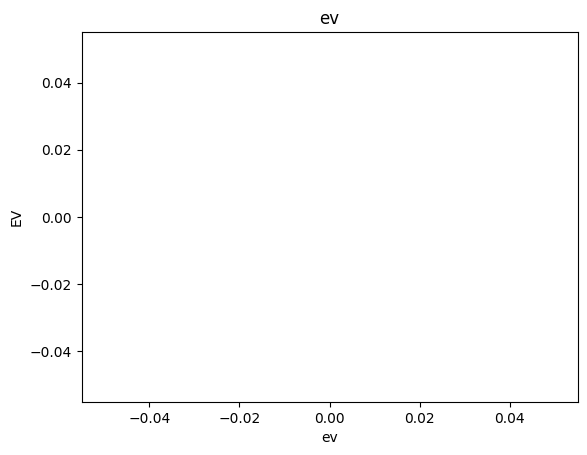

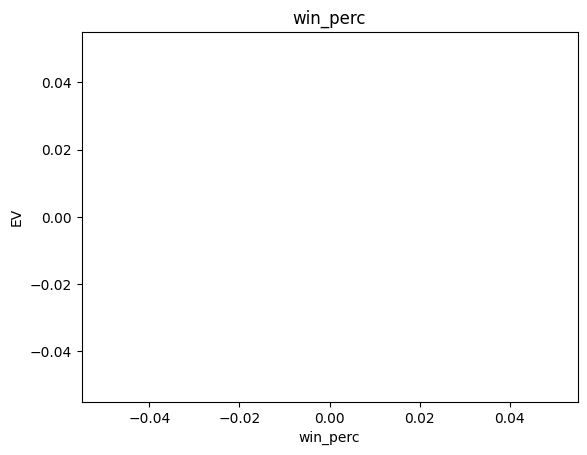

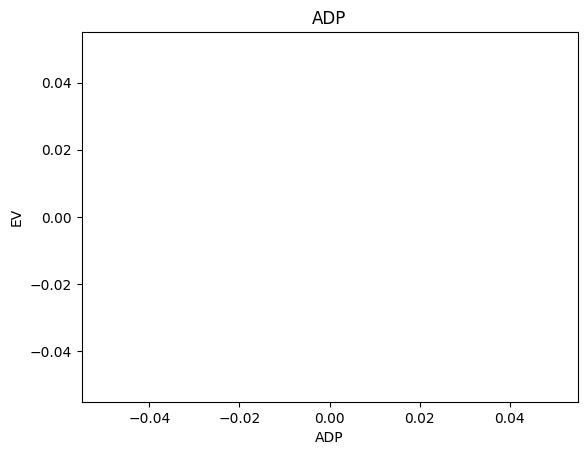

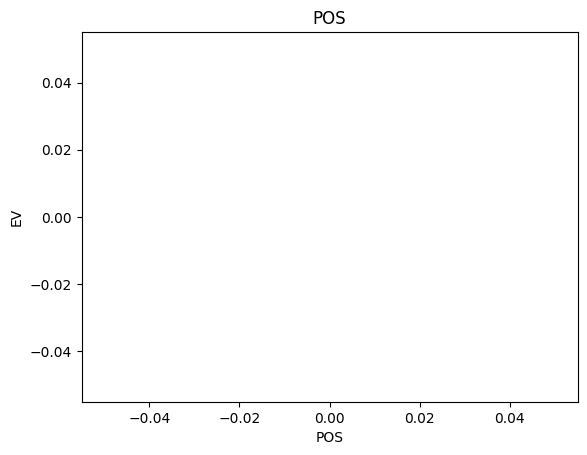

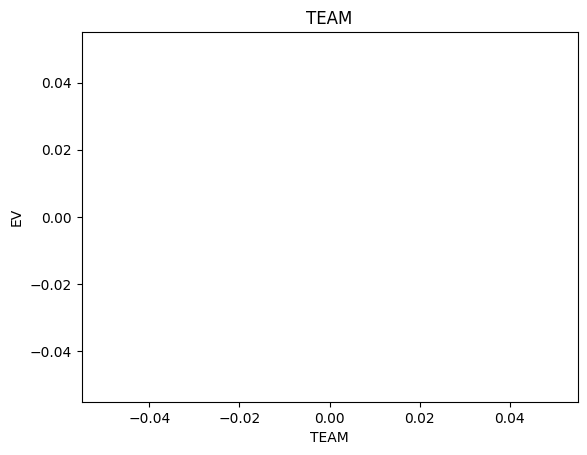

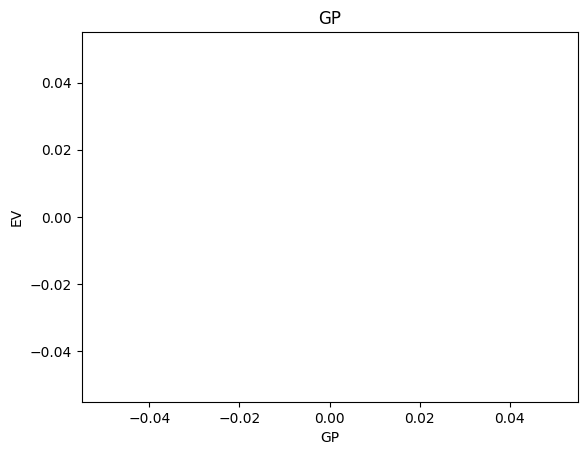

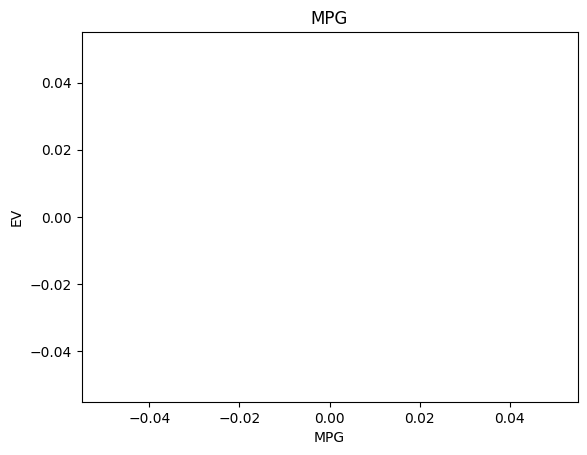

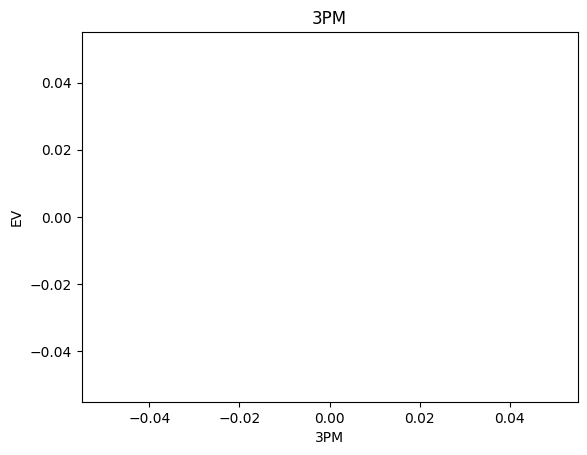

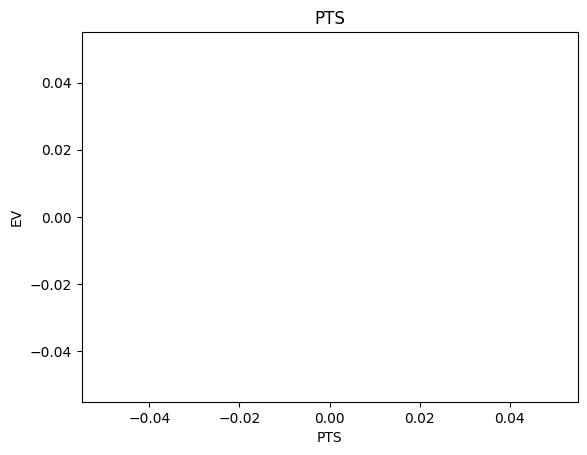

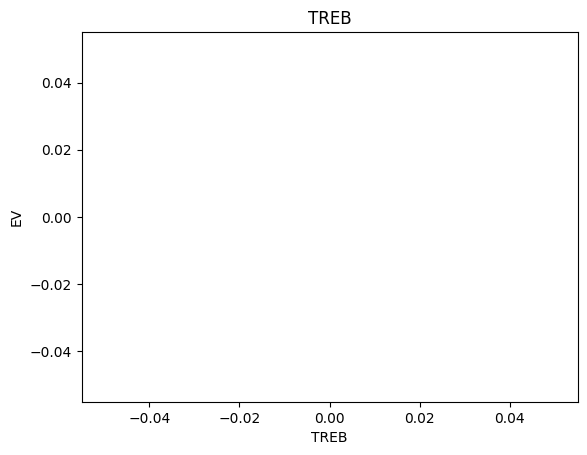

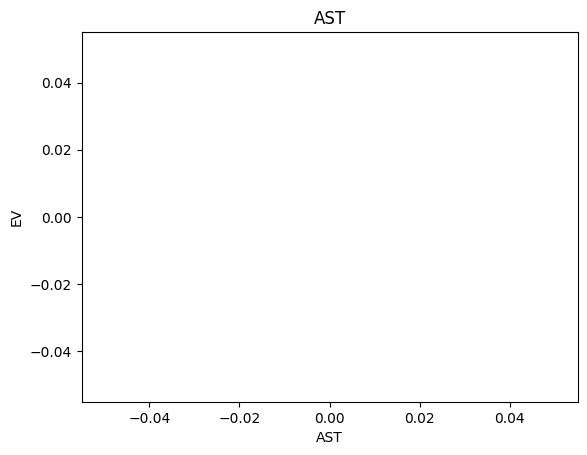

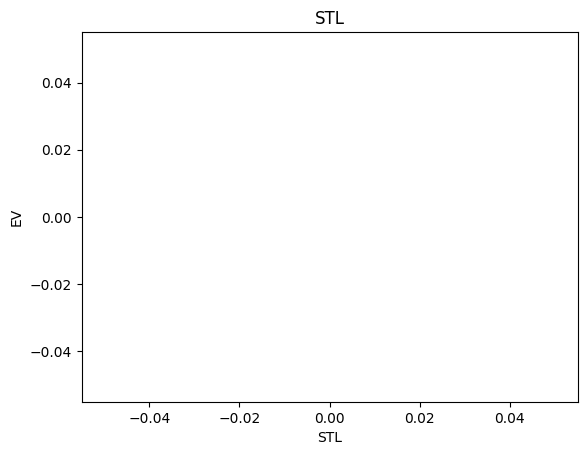

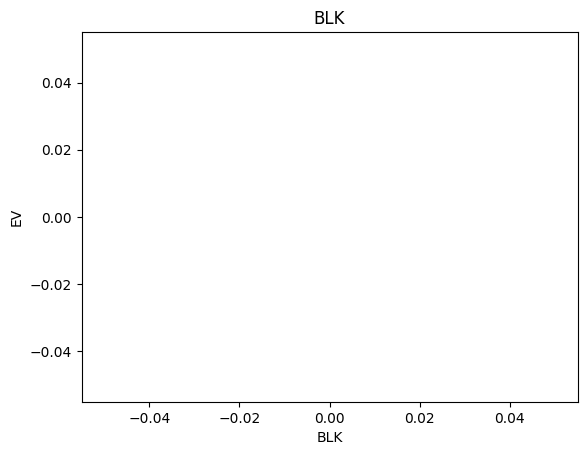

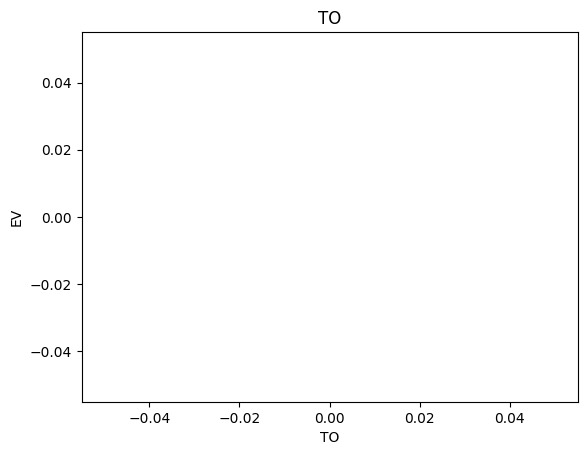

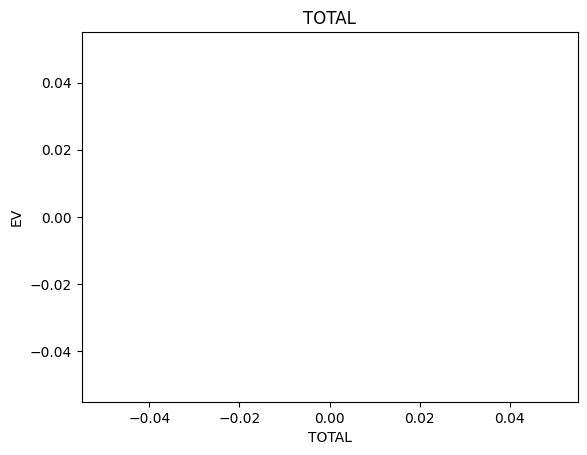

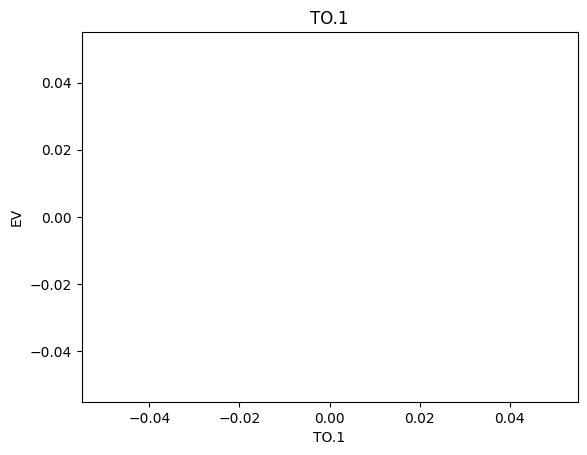

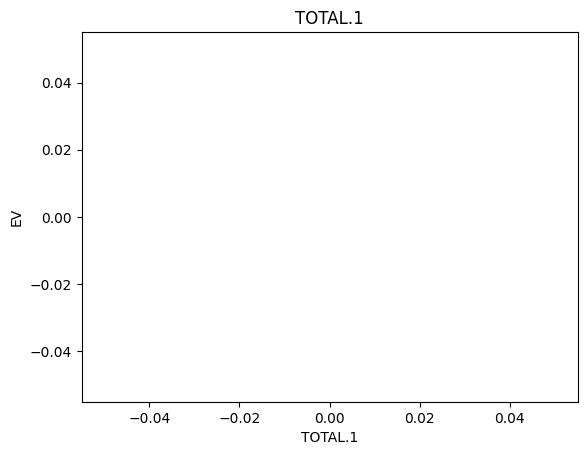

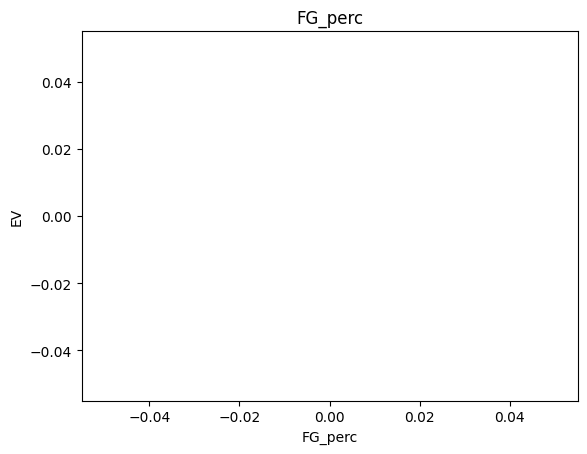

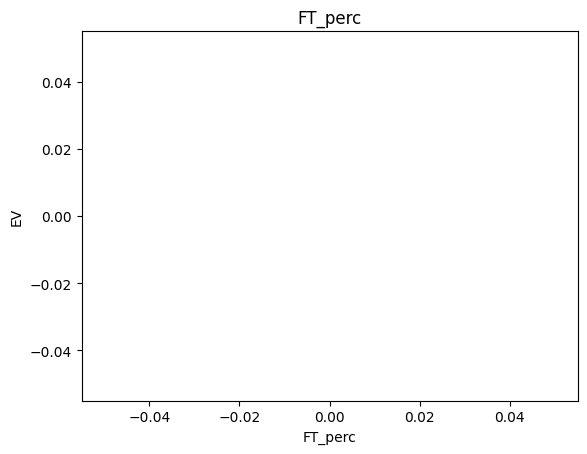

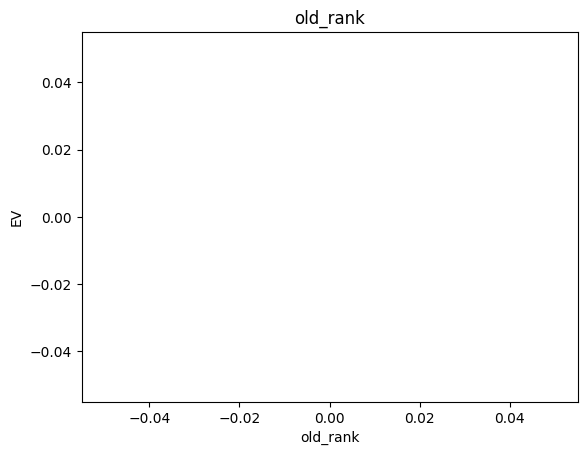

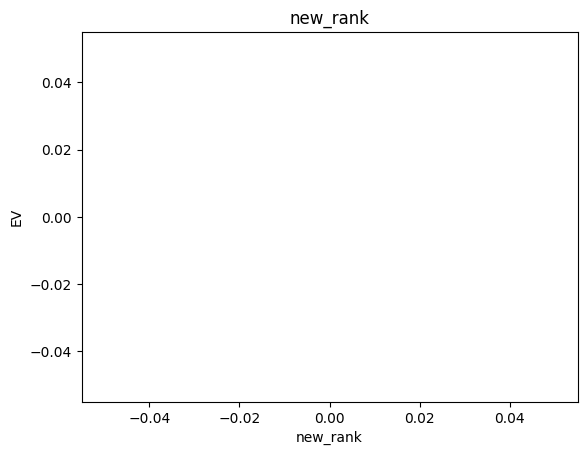

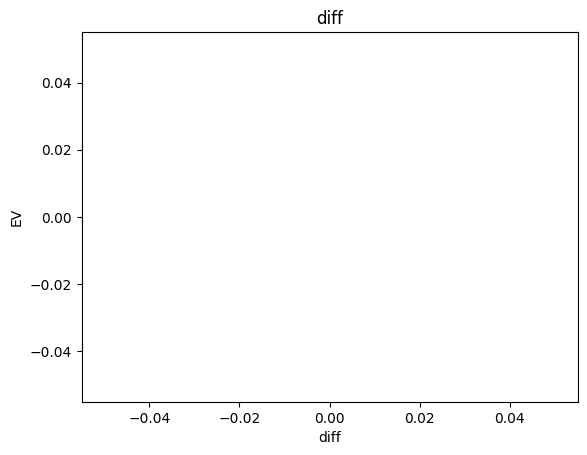

In [33]:
for col in combined:
    plt.scatter(combined[col], combined['ev'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('EV')
    plt.show()
#     print(col)

In [34]:
combined['draft_diff']=combined['ADP']-combined['new_rank']
combined.loc[combined['GP']>60].sort_values('draft_diff', ascending=False)

,ev,win_perc,ADP,POS,TEAM,GP,MPG,3PM,PTS,TREB,...,TO,TOTAL,TO.1,TOTAL.1,FG_perc,FT_perc,old_rank,new_rank,diff,draft_diff


In [35]:
scaled = (combined['ev']-combined['ev'].median())/combined['ev'].std()


In [36]:
combined.loc[combined['GP']>60].sort_values('wins_added', ascending=False)

KeyError: 'wins_added'

In [ ]:
combined['scaled_ev'] = 20*(scaled-scaled.min())/(scaled.max()-scaled.min())

In [ ]:
combined['scaled_ev']

In [ ]:
scaled = combined['ev']**2
combined['scaled_wins'] =17*(scaled-scaled.min())/(scaled.max()-scaled.min())

In [561]:
combined['scaled_wins'].sum()/200/14

0.3035887948103351

In [575]:
combined['dollar']=combined['wins_added']/.226

In [576]:
combined['dollar']

Nikola Jokic                100.082884
Joel Embiid                  69.834664
Kevin Durant                 68.212821
Giannis Antetokounmpo        68.976041
James Harden                 56.568098
Luka Doncic                  68.828729
LeBron James                 63.061084
Trae Young                   46.595726
Stephen Curry                54.502914
Jayson Tatum                 55.440104
Damian Lillard               47.128858
Karl-Anthony Towns           45.077703
Kyrie Irving                 38.821822
Anthony Davis                41.662853
DeMar DeRozan                25.062810
Devin Booker                 41.443989
Jimmy Butler                 22.784373
Kawhi Leonard                31.230304
Shai Gilgeous-Alexander      26.039283
Paul George                  31.673646
Ja Morant                    28.575869
LaMelo Ball                  48.059033
Tyrese Haliburton            43.352040
Bam Adebayo                  26.162746
Kristaps Porzingis           26.937190
Khris Middleton          

In [442]:
combined.to_csv('./evs.csv')

In [ ]:
LeBron James 	46.4 	5.161
Fred VanVleet 	30.6 	4.880
Shai Gilgeous-Alexander 	24.6 	4.790
Kristaps Porzingis 	21.4 	4.820
Khris Middleton 	20.8 	4.796
Terry Rozier 	16.4 	4.817
Julius Randle 	13.2 	4.661
Klay Thompson 	8.4 	4.588
Saddiq Bey 	4.6 	4.585
PJ Washington 	4.1 	4.571
Gordon Hayward 	3.2 	4.541
Kyle Lowry 	3.2 	4.610
Kyle Kuzma 	3.0 	4.500

In [518]:
combined['wins_added'] = (combined['ev']-4.5)*26*combined['GP']/82

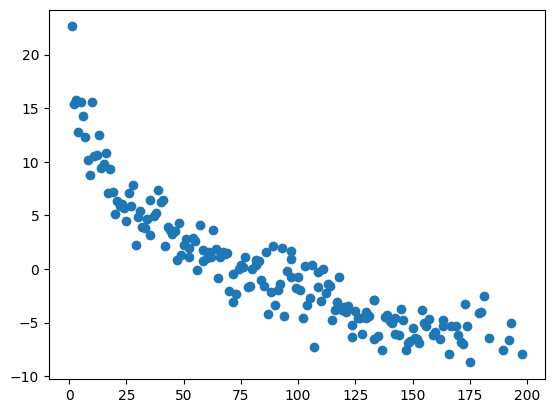

In [516]:
combined.columns

Index(['ev', 'win_perc', 'ADP', 'POS', 'TEAM', 'GP', 'MPG', '3PM', 'PTS',
       'TREB', 'AST', 'STL', 'BLK', 'TO', 'TOTAL', 'TO.1', 'TOTAL.1',
       'FG_perc', 'FT_perc', 'old_rank', 'new_rank', 'diff', 'draft_diff',
       'dollar', 'scaled_ev', 'wins_added'],
      dtype='object')

In [521]:
ht=pd.read_csv('./hashtag_auction.csv', index_col=0)
#ht = ht.apply(pd.to_numeric, errors='ignore')
ht = ht.replace({'\$': ''}, regex=True)
ht = ht.apply(pd.to_numeric, errors='ignore')
ht = ht.fillna(0)
ht.loc[ht['Y! AVG']<1.0, 'Y! AVG'] = 1.0

In [ ]:
#ht = ht.set_index('PLAYER')
ht.columns
#combined.columns
combined = combined.join(ht, rsuffix='_b')

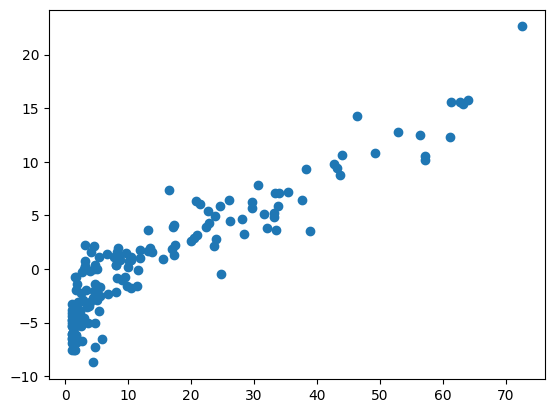

In [537]:
plt.scatter(combined['Y! AVG'], combined['wins_added'])
plt.show()
combined['wins_per_dollar']=combined['wins_added']/combined['Y! AVG']

In [1]:
#combined.drop(['cost_per_win', 'scaled_ev'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
combined['new']= combined['old_rank']-combined['new_rank']
combined.sort_values('new', ascending=False)

NameError: name 'pd' is not defined

In [588]:
team = combined.loc[['LeBron James', 'CJ McCollum','Julius Randle', 'Paul George', 'Nikola Vucevic'
              ,'Wendell Carter Jr.', 'Gary Trent Jr.', 'Jerami Grant', 'Spencer Dinwiddie'
             , 'Cole Anthony', 'Bones Hyland', 'Malik Beasley', 'Kevin Love'], :]
team['yahoo'] = [18, 52, 69, 19, 36, 75, 90, 81, 112, 115, 118, 163, 178]

In [590]:
team['yahoo_diff'] = team['yahoo'] - team['new_rank']

In [594]:
team.sum()

ev                                                            59.384
win_perc                                                      647.88
ADP                                                           1089.2
POS                SF,PFPG,SGPFSF,PFCPF,CPG,SGPFPG,SGPGPG,SGSG,SF...
TEAM                         LALNOPNYKLACCHIORLTORPORDALORLDENUTACLE
GP                                                               904
MPG                                                            406.1
3PM                                                             29.1
PTS                                                            232.1
TREB                                                            78.8
AST                                                             46.4
STL                                                             12.0
BLK                                                              6.8
TO                                                              27.2
TOTAL                             

In [595]:
team['wins_added']

LeBron James          14.252
CJ McCollum            4.113
Julius Randle          3.676
Paul George            7.158
Nikola Vucevic         6.406
Wendell Carter Jr.     0.335
Gary Trent Jr.         0.400
Jerami Grant          -2.330
Spencer Dinwiddie     -0.732
Cole Anthony          -2.868
Bones Hyland          -3.584
Malik Beasley         -3.260
Kevin Love            -4.053
Name: wins_added, dtype: float64